In [31]:
from nsepy import get_history
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stock="AUROPHARMA"
start=start=date(2021,5,1)
end=date(2021,6,24)
end2=date(2021,7,29)
end3=date(2021,8,26)
data_nearmonth_fut = get_history(symbol=stock,futures=True,start=start, end=end,
expiry_date=end)
data_nextmonth_fut = get_history(symbol=stock,futures=True,start=start, end=end2,
expiry_date=end2)
data_farmonth_fut = get_history(symbol=stock,futures=True,start=start, end=end3,
expiry_date=end3)
stock_data = get_history(symbol=stock,start=start, end=end3)

In [32]:
stock_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-05-03,AUROPHARMA,EQ,980.85,979.70,986.25,965.5,968.70,968.75,972.47,1415097,1.376142e+14,42365,283656,0.2004
2021-05-04,AUROPHARMA,EQ,968.75,973.95,980.00,950.0,956.85,956.50,963.12,1676068,1.614262e+14,42539,503723,0.3005
2021-05-05,AUROPHARMA,EQ,956.50,957.10,1024.90,955.8,1024.20,1018.05,998.34,6019729,6.009732e+14,122299,1407547,0.2338
2021-05-06,AUROPHARMA,EQ,1018.05,1035.00,1039.00,1000.0,1005.40,1009.05,1014.19,4590785,4.655917e+14,85196,1499194,0.3266
2021-05-07,AUROPHARMA,EQ,1009.05,1009.10,1023.00,1001.0,1015.00,1013.05,1013.29,2295907,2.326426e+14,48925,404563,0.1762


In [33]:
OI_combined= pd.concat([data_nearmonth_fut['Open Interest'],data_nextmonth_fut['Open Interest'], data_farmonth_fut['Open Interest']],
axis=1)
OI_combined['oi_combined']=OI_combined.sum(axis=1)
OI_combined['close'] = stock_data.Close
OI_combined['price_change'] = (stock_data['Close'].pct_change()) * 100
OI_combined['oi_change'] = OI_combined['oi_combined'].diff()
OI_combined['oi_pct_change'] = (OI_combined['oi_combined'].pct_change()) * 100
OI_combined['delivery'] = stock_data['Deliverable Volume']
OI_combined['%Deliverble'] = stock_data['%Deliverble']
OI_combined['VWAP'] = stock_data['VWAP']
OI_combined['5d_del_avg'] = stock_data.iloc[:,12].rolling(window=5).mean()
OI_combined['chg_delivery'] =  OI_combined['delivery'] / OI_combined['5d_del_avg']

In [34]:
long_build_up = OI_combined[(OI_combined['price_change'] > 0) & (OI_combined['oi_change'] > 0) & (OI_combined.index != end)]

In [39]:
OI_combined['long_buildup'] = np.where((OI_combined['price_change'] > 0) & (OI_combined['oi_change'] > 0) & (OI_combined.index != end), True, None)

In [40]:
OI_combined['short_buildup'] = np.where((OI_combined['price_change'] < 0) & (OI_combined['oi_change'] > 0) & (OI_combined.index != end), True, None)

In [41]:
short_build_up = OI_combined[(OI_combined['price_change'] < 0) & (OI_combined['oi_change'] > 0) & (OI_combined.index != end)]

In [42]:
OI_combined['long_unwinding'] = np.where((OI_combined['price_change'] < 0) & (OI_combined['oi_change'] < 0) & (OI_combined.index != end), True, None)

In [23]:
long_unwinding = OI_combined[(OI_combined['price_change'] < 0) & (OI_combined['oi_change'] < 0) & (OI_combined.index != end)]

In [44]:
OI_combined['short_covering'] = np.where((OI_combined['price_change'] > 0) & (OI_combined['oi_change'] < 0) & (OI_combined.index != end), True, None)

In [24]:
short_covering = OI_combined[(OI_combined['price_change'] > 0) & (OI_combined['oi_change'] < 0) & (OI_combined.index != end)]

In [45]:
OI_combined[OI_combined['long_buildup'] == True]['oi_change'].sum() - OI_combined[OI_combined['long_unwinding'] == True]['oi_change'].sum()

12628850.0

In [25]:
total_long_buildup = long_build_up['oi_change'].sum() - long_unwinding['oi_change'].sum()

In [26]:
total_long_buildup

12628850.0

In [27]:
OI_combined[OI_combined['chg_delivery'] > 1][['close', 'VWAP']]

,close,VWAP
2021-05-10,1047.95,1045.13
2021-05-12,1017.30,1020.63
2021-05-14,1006.70,1010.37
2021-05-19,1017.10,1015.39
2021-05-20,1025.50,1024.22
2021-05-26,1023.35,1030.98
2021-05-27,1031.60,1028.29
2021-05-31,997.95,1002.50
2021-06-01,970.30,973.33
2021-06-02,966.45,969.00


In [28]:
total_short_buildup = short_build_up['oi_change'].sum() - short_covering['oi_change'].sum()

In [29]:
total_short_buildup

7120750.0

In [30]:
total_long_buildup > total_short_buildup

True

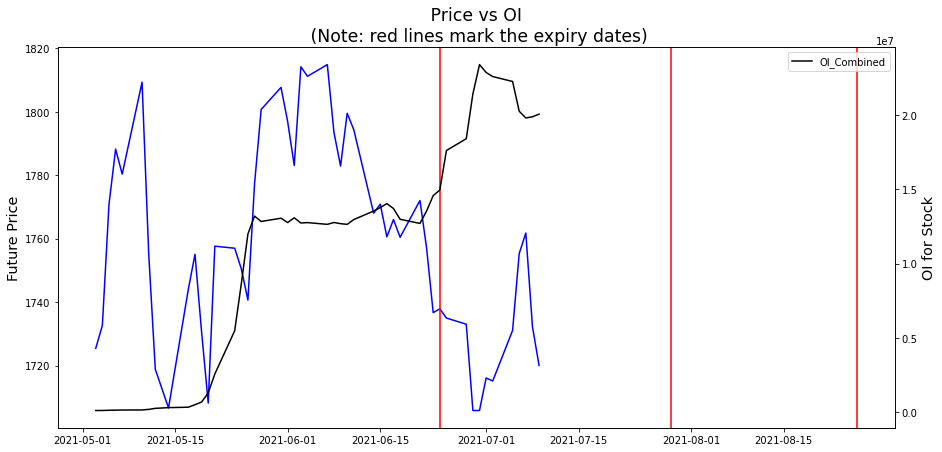

In [6]:
ax =OI_combined['Close'].plot(figsize=(15,7), color='b')
plt.ylabel('Future Price',fontsize='x-large')
plt.title(' Price vs OI \n (Note: red lines mark the expiry dates)',fontsize ='xx-large')
plt.axvline(end, color='r') # Apr expiry
plt.axvline(end2,color='r') # May expiry
plt.axvline(end3,color='r') # Jun expiry

#plt.axvline(datetime(2020, 3, 13),color='black', ls=':', ymax=0.95)

OI_combined['OI_Combined'].plot(ax=ax, secondary_y=True,color='black')
plt.ylabel('OI for Stock',fontsize='x-large')
plt.legend()
plt.show()

In [4]:
# Creating a function to generate rollover percent
def rollover():
   ''' This function takes the futures data, expiry date
       and returns an estimate of rollover percent '''
  
   #df = data.loc[expiry_date]
  
   Near_month_oi = data_nearmonth_fut['Open Interest'].mean()
   Next_month_oi = data_nextmonth_fut['Open Interest'].mean()
   Far_month_oi = data_farmonth_fut['Open Interest'].mean()
  
   return round(100* (Next_month_oi + Far_month_oi) /  (Near_month_oi + Next_month_oi + Far_month_oi),2)

# Creating a new DataFrame with rollover % for expiry dates
expiry_dates =[end,end2,end3]

expiry_df = pd.DataFrame(index=expiry_dates , columns = ['rollover %','oi', stock])

for i in range(len(expiry_dates)):
    expiry_df['rollover %'].iloc[i] = rollover()
    expiry_df['oi'].iloc[i] = data_nextmonth_fut['Open Interest']#.loc[expiry_dates[i]]
    expiry_df[stock].iloc[i] = data_nearmonth_fut['Close']#.loc[expiry_dates[i]]
  
expiry_df.index.name='Expiry_date'
expiry_df

ValueError: No axis named 1 for object type Series

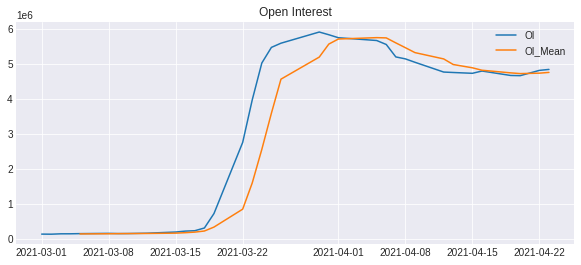

In [66]:
ax =OI_combined['Close'].plot(figsize=(15,7), color='b')
plt.ylabel('Future Price',fontsize='x-large')
plt.title(' Price vs OI \n (Note: red lines mark the expiry dates)',fontsize ='xx-large')
plt.axvline(datetime(2021, 3, 25), color='r') # Jan expiry
plt.axvline(datetime(2021, 4, 29),color='r') # Feb expiry
plt.axvline(datetime(2021, 5, 27),color='r') # March expiry

#plt.axvline(datetime(2020, 3, 13),color='black', ls=':', ymax=0.95)

OI_combined['OI_Combined'].plot(ax=ax, secondary_y=True,color='black')
plt.ylabel('OI for Stock',fontsize='x-large')
plt.legend()
plt.show()

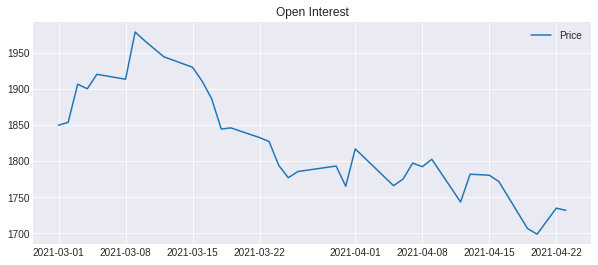

In [59]:
plt.figure(1,figsize=(10,9))
plt.subplot(211)
plt.title('Open Interest')
#plt.plot(OI_combined.OI_Combined,label='OI')
plt.plot(OI_combined.Close,label='Close')
#plt.plot(OI_combined.Close,label='Price')
plt.legend(['Price'])

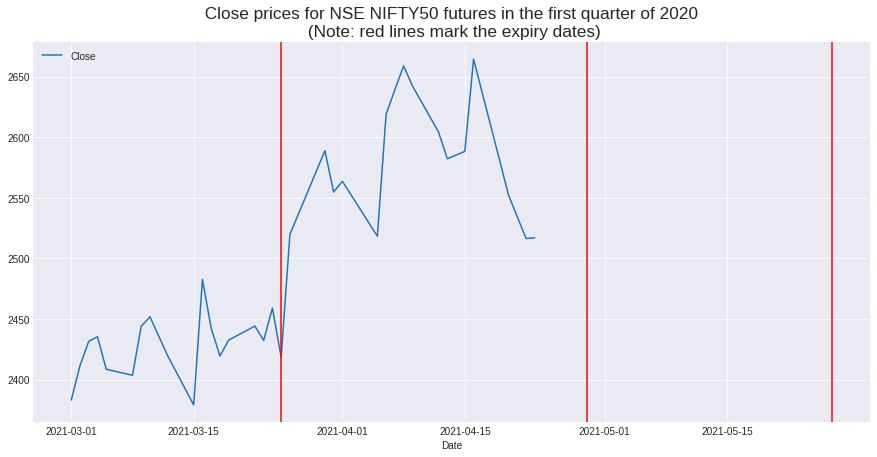

In [67]:
OI_combined['Close'].plot(figsize=(15,7))
plt.title(' Close prices for NSE NIFTY50 futures in the first quarter of 2020 \n (Note: red lines mark the expiry dates)'\
        ,fontsize ='xx-large')
plt.axvline(datetime(2021, 3, 25), color='r') # Jan expiry
plt.axvline(datetime(2021, 4, 29),color='r') # Feb expiry
plt.axvline(datetime(2021, 5, 27),color='r') # March expiry
plt.legend()
plt.show()

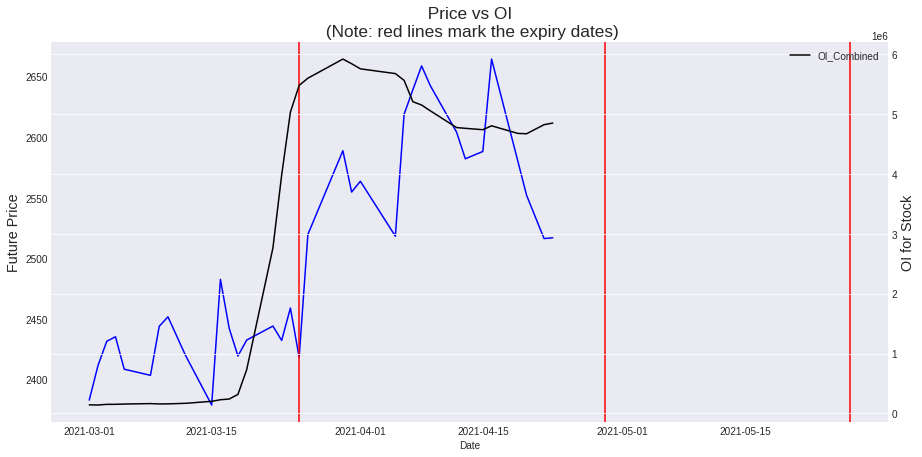

In [68]:
ax =OI_combined['Close'].plot(figsize=(15,7), color='b')
plt.ylabel('Future Price',fontsize='x-large')
plt.title(' Price vs OI \n (Note: red lines mark the expiry dates)',fontsize ='xx-large')
plt.axvline(datetime(2021, 3, 25), color='r') # Jan expiry
plt.axvline(datetime(2021, 4, 29),color='r') # Feb expiry
plt.axvline(datetime(2021, 5, 27),color='r') # March expiry

#plt.axvline(datetime(2020, 3, 13),color='black', ls=':', ymax=0.95)

OI_combined['OI_Combined'].plot(ax=ax, secondary_y=True,color='black')
plt.ylabel('OI for Stock',fontsize='x-large')
plt.legend()
plt.show()